In [12]:
import zipfile
from google.colab import drive
import os

In [18]:
!gdown --id 1qRx1OEEQnfXUapd-55hveD46TEJu11Kx

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1qRx1OEEQnfXUapd-55hveD46TEJu11Kx
To: /content/cell_images.zip
100% 354M/354M [00:02<00:00, 155MB/s]


In [19]:
zip_ref = zipfile.ZipFile("/content/cell_images.zip", 'r')
zip_ref.extractall("/content/data")
zip_ref.close()

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread

In [23]:
data_dir = "/content/data/cell_images/"

In [24]:
test_path = data_dir + "test/"
train_path = data_dir + "train/"

In [25]:
os.listdir(test_path)

['uninfected', 'parasitized']

In [26]:
para_cell = train_path+"parasitized"

In [29]:
dim1 = []
dim2 = []

for image_filename in os.listdir(test_path+"uninfected"):
  img = imread(test_path+"uninfected/"+image_filename)
  d1,d2, colors = img.shape
  dim1.append(d1)
  dim2.append(d2)

In [33]:
np.mean(dim1) # get the mean dimensions to work with

130.92538461538462

In [34]:
np.mean(dim2) # get the mean dimensions to work with

130.75

In [36]:
image_shape= (130, 130, 3) # the new image_shape to apply to all images

In [37]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [39]:
#help(ImageDataGenerator)

In [42]:
image_gen = ImageDataGenerator(rotation_range=20, 
                               width_shift_range=0.1,
                               height_shift_range=0.1,
                               shear_range=0.1,
                               zoom_range=0.1,
                               horizontal_flip=True,
                               fill_mode="nearest") # use this to create more images to the dataset by transforming the images

In [43]:
image_gen.flow_from_directory(train_path)

Found 24958 images belonging to 2 classes.


In [44]:
image_gen.flow_from_directory(test_path)

Found 2600 images belonging to 2 classes.


In [51]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Dropout, Flatten

In [52]:
model = Sequential()

model.add(Conv2D(filters=32, 
                 kernel_size=(3,3), 
                 input_shape=image_shape,
                 activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, 
                 kernel_size=(3,3), 
                 input_shape=image_shape,
                 activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, 
                 kernel_size=(3,3), 
                 input_shape=image_shape,
                 activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128, activation="relu"))
model.add(Dropout(0.5))

model.add(Dense(1, activation="sigmoid"))

model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])


In [53]:
from tensorflow.keras.callbacks import EarlyStopping

In [54]:
early_stop = EarlyStopping(monitor="val_loss", patience=2)

In [55]:
batch_size = 16

In [57]:
train_image_gen = image_gen.flow_from_directory(train_path,
                                                target_size=image_shape[:2],
                                                color_mode="rgb",
                                                batch_size=batch_size,
                                                class_mode="binary")

Found 24958 images belonging to 2 classes.


In [59]:
test_image_gen = image_gen.flow_from_directory(test_path,
                                                target_size=image_shape[:2],
                                                color_mode="rgb",
                                                batch_size=batch_size,
                                                class_mode="binary",
                                                shuffle=False)

Found 2600 images belonging to 2 classes.


In [60]:
train_image_gen.class_indices

{'parasitized': 0, 'uninfected': 1}

In [61]:
results = model.fit_generator(train_image_gen,
                              epochs=20,
                              validation_data=test_image_gen,
                              callbacks=[early_stop])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  after removing the cwd from sys.path.


Epoch 1/20
1560/1560 [==============================] - 780s 499ms/step - loss: 1.0522 - accuracy: 0.5461 - val_loss: 0.6811 - val_accuracy: 0.5742
Epoch 2/20
1560/1560 [==============================] - 777s 498ms/step - loss: 0.6782 - accuracy: 0.5788 - val_loss: 0.6745 - val_accuracy: 0.5869
Epoch 3/20
1560/1560 [==============================] - 765s 490ms/step - loss: 0.6739 - accuracy: 0.5913 - val_loss: 0.6677 - val_accuracy: 0.6046
Epoch 4/20
1560/1560 [==============================] - 764s 489ms/step - loss: 0.6726 - accuracy: 0.5912 - val_loss: 0.6793 - val_accuracy: 0.5769
Epoch 5/20
1560/1560 [==============================] - 756s 484ms/step - loss: 0.6631 - accuracy: 0.6088 - val_loss: 0.6606 - val_accuracy: 0.6150
Epoch 6/20
1560/1560 [==============================] - 760s 487ms/step - loss: 0.6591 - accuracy: 0.6172 - val_loss: 0.6538 - val_accuracy: 0.6262
Epoch 7/20
1560/1560 [==============================] - 762s 488ms/step - loss: 0.6642 - accuracy: 0.6156 - val_

In [64]:
model.evaluate_generator(test_image_gen)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """Entry point for launching an IPython kernel.


[0.17829377949237823, 0.9411538243293762]

In [65]:
pred = model.predict_generator(test_image_gen)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  """Entry point for launching an IPython kernel.


In [66]:
pred = pred > 0.5
pred

array([[False],
       [False],
       [False],
       ...,
       [ True],
       [ True],
       [ True]])

In [67]:
from sklearn.metrics import classification_report, confusion_matrix

In [68]:
print(classification_report(test_image_gen.classes, pred))

              precision    recall  f1-score   support

           0       0.98      0.91      0.94      1300
           1       0.91      0.98      0.95      1300

    accuracy                           0.94      2600
   macro avg       0.95      0.94      0.94      2600
weighted avg       0.95      0.94      0.94      2600



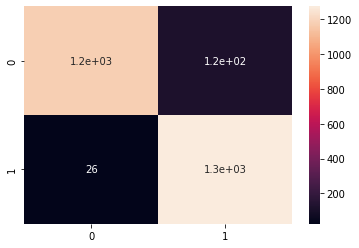

In [70]:
sns.heatmap(confusion_matrix(test_image_gen.classes, pred), annot=True)

In [71]:
from tensorflow.keras.preprocessing import image

In [74]:
single_image = image.load_img(test_path+"parasitized/C100P61ThinF_IMG_20150918_144348_cell_144.png", target_size=image_shape)

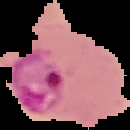

In [75]:
single_image

In [82]:
single_image_arr = image.img_to_array(single_image)

In [83]:
single_image_arr = np.expand_dims(single_image_arr, axis=0) # the first dim to be (1, 130,130, 3)

In [85]:
model.predict(single_image_arr) > 0.5

array([[False]])